In [1]:
import tweepy
import csv
import re
import pandas as pd
from flashtext import KeywordProcessor

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from wordcloud import WordCloud
import nltk 
from nltk.tokenize.toktok import ToktokTokenizer
tokenizer = ToktokTokenizer()
from nltk.corpus import stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /home/nust61/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
df = pd.read_csv('Corona_tweets.csv')
df

,Unnamed: 0,Time,Location,text
0,1,16/03/2020,London,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...
1,2,16/03/2020,UK,advice Talk to your neighbours family to excha...
2,3,16/03/2020,Vagabonds,Coronavirus Australia: Woolworths to give elde...
3,4,16/03/2020,NaN,My food stock is not the only one which is emp...
4,5,16/03/2020,NaN,"Me, ready to go at supermarket during the #COV..."
...,...,...,...,...
41152,41153,14/04/2020,"Wellington City, New Zealand",Airline pilots offering to stock supermarket s...
41153,41154,14/04/2020,NaN,Response to complaint not provided citing COVI...
41154,41155,14/04/2020,NaN,You know itÂ’s getting tough when @KameronWild...
41155,41156,14/04/2020,NaN,Is it wrong that the smell of hand sanitizer i...


In [3]:
df.dropna()

,Unnamed: 0,Time,Location,text
0,1,16/03/2020,London,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...
1,2,16/03/2020,UK,advice Talk to your neighbours family to excha...
2,3,16/03/2020,Vagabonds,Coronavirus Australia: Woolworths to give elde...
5,6,16/03/2020,"ÃœT: 36.319708,-82.363649",As news of the regionÂ’s first confirmed COVID...
6,7,16/03/2020,"35.926541,-78.753267",Cashier at grocery store was sharing his insig...
...,...,...,...,...
41147,41148,14/04/2020,"Brooklyn, NY",YÂ’all really shitting that much more at home?...
41149,41150,14/04/2020,"Toronto, Ontario",Still shocked by the number of #Toronto superm...
41150,41151,14/04/2020,OHIO,I never that weÂ’d be in a situation &amp; wor...
41152,41153,14/04/2020,"Wellington City, New Zealand",Airline pilots offering to stock supermarket s...


In [4]:
df.columns

Index(['Unnamed: 0', 'Time', 'Location', 'text'], dtype='object')

In [5]:
df1 = df.filter(['text','Time'])

In [6]:
df1

,text,Time
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,16/03/2020
1,advice Talk to your neighbours family to excha...,16/03/2020
2,Coronavirus Australia: Woolworths to give elde...,16/03/2020
3,My food stock is not the only one which is emp...,16/03/2020
4,"Me, ready to go at supermarket during the #COV...",16/03/2020
...,...,...
41152,Airline pilots offering to stock supermarket s...,14/04/2020
41153,Response to complaint not provided citing COVI...,14/04/2020
41154,You know itÂ’s getting tough when @KameronWild...,14/04/2020
41155,Is it wrong that the smell of hand sanitizer i...,14/04/2020


In [7]:
def clean_text(text):
    
    """
    A function to clean the tweet text
    """
    #Remove hyper links
    text = re.sub(r'https?:\/\/\S+', ' ', text)
    
    #Remove @mentions
    text = re.sub(r'@[A-Za-z0-9]+', ' ', text)
    
    #Remove anything that isn't a letter, number, or one of the punctuation marks listed
    text = re.sub(r"[^A-Za-z0-9#'!,.]+", ' ', text)   
    
    return text

In [8]:
df1['text']=df1['text'].apply(clean_text)

In [9]:
stopwords = stopwords.words("english")

In [10]:
def remove_stopwords(text):
    
    """
    A function to remove stop words
    """
    
    # Tokenize the text
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    
    # Remove stop words
    filtered_tokens = [token for token in tokens if token not in stopwords]
    filtered_text = ' '.join(filtered_tokens)    
    
    return filtered_text

In [11]:
# Apply the stopword removal function to the text of all tweets
df1['text']=df1['text'].apply(remove_stopwords)

# Print the first 20 tweets
for i,tweet in enumerate(df1['text'].head(20)):
    print(i+1, tweet, '\n')



1 Gahan 

2 advice Talk neighbours family exchange phone numbers create contact list phone numbers neighbours schools employer chemist GP set online shopping accounts poss adequate supplies regular meds order 

3 Coronavirus Australia Woolworths give elderly , disabled dedicated shopping hours amid COVID 19 outbreak 

4 My food stock one empty ... PLEASE , ' panic , THERE WILL BE ENOUGH FOOD FOR EVERYONE take need. Stay calm , stay safe. #COVID19france #COVID 19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral 

5 Me , ready go supermarket #COVID19 outbreak. Not I ' paranoid , food stock litteraly empty. The #coronavirus serious thing , please , ' panic. It causes shortage ... #CoronavirusFrance #restezchezvous #StayAtHome #confinement 

6 As news region first confirmed COVID 19 case came Sullivan County last week , people flocked area stores purchase cleaning supplies , hand sanitizer , food , toilet paper goods , Dodson reports 

7 Cashier grocery store sharing

In [12]:
df1[df1['text'].str.contains("lockdown")]

,text,Time
10,All month ' crowding supermarkets restaurants ...,16/03/2020
42,CHECK VIDEO No food USA market due coronavirus...,16/03/2020
93,"Pretty sure within week two , supermarket supp...",16/03/2020
141,World leaders still realize #Kashmir struggle ...,16/03/2020
204,Panic buying Malaysia escalated today followin...,16/03/2020
...,...,...
41118,"Despite midst pandemic , time lockdown highlig...",14/04/2020
41125,#PMModi addressed nation amp extended lockdown...,14/04/2020
41133,A Singaporean politician slammed woman snapped...,14/04/2020
41143,#5gtowers #EcuadorUnido #cruiseships #SaveTheC...,14/04/2020


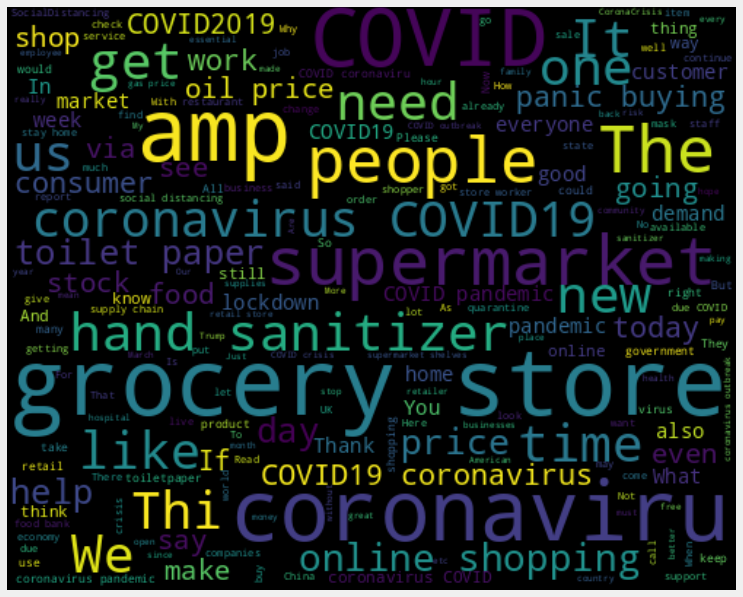

In [13]:
# Plot a word cloud

all_words = ' '.join( [data for data in df1['text']])
word_cloud = WordCloud(width=500, height=400, random_state=21, max_font_size = 100,
                       stopwords=stopwords).generate(all_words)

plt.figure(figsize = (20,10))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [14]:
df1.to_csv('external_dataset_cleaned.csv')